In [2]:
%matplotlib notebook

In [3]:
# Import Dependencies
import random
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import pandas as pd

In [5]:
measles_raw_data = pd.read_csv("measles - measles.csv")
measles_raw_data.head()
measles_raw_data.groupby("year").count()

C:\Users\fkmaa\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,state,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
year,,,,,,,,,,,,,,,
2017,1939,1939,1939,0,1939,0,0,1939,1939,1939,0,0,0,1939,1939
2017-18,10418,10418,10418,7183,6060,10390,0,4970,10418,10418,9,1829,2698,10410,10410
2018-19,48075,48075,48075,22308,34573,43788,0,40900,48075,48075,84,17723,4483,46539,46539


In [6]:
measles_clean = measles_raw_data.drop(columns=["xper", "xmed", "xrel", "district", "year", "county", "enroll"])
# measles_clean = measles_clean.dropna()

# measles_clean.dtypes

In [7]:
# neg_count = measles_clean.loc[["mmr" == "-1"]]
# len(neg_count)

measles_clean['mmr'].value_counts()
measles_clean['overall'].value_counts()

-1.000000      27224
 98.000000      5191
 100.000000     3619
 95.000000      3051
 99.000000      1764
               ...  
 90.140845         1
 96.020000         1
 43.640000         1
 98.098859         1
 90.052356         1
Name: overall, Length: 2691, dtype: int64

In [8]:
measles_clean = measles_clean.loc[measles_clean["mmr"] >= 0]
measles_clean = measles_clean.loc[measles_clean["overall"] >= 0]
# measles_clean

In [9]:
measles_clean["type"].fillna("Other", inplace = True)
measles_clean

,index,state,name,type,city,mmr,overall,lat,lng
2018,1,California,Abby Reinke Elementary,Public,Temecula,99.00,96.00,33.492008,-117.087291
2019,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,33.741155,-117.902009
2020,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,34.077328,-117.317020
2021,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,34.227892,-118.252604
2022,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,33.734440,-116.373073
...,...,...,...,...,...,...,...,...,...
63242,1364,Washington,Overcomer Academy,Other,Auburn,23.53,17.65,47.301117,-122.276320
63243,1365,Washington,Salvation Christian Academy- Formerly Slavic C...,Other,Edgewood,22.22,22.22,47.249023,-122.287615
63244,1366,Washington,Saratoga,Other,Stanwood,20.00,20.00,48.242579,-122.359097
63245,1367,Washington,Skagit Family Learning Center,Other,Mount Vernon,17.65,11.76,48.406426,-122.339166


In [10]:
measles_clean.groupby("type").count()

,index,state,name,city,mmr,overall,lat,lng
type,,,,,,,,
Kindergarten,1484,1484,1484,0,1484,1484,1484,1484
Other,3122,3122,3122,1978,3122,3122,3121,3121
Private,2258,2258,2258,2237,2258,2258,2207,2207
Public,14904,14904,14904,14904,14904,14904,14895,14895


In [11]:
measles_clean.state.unique()
measles_clean.head()

,index,state,name,type,city,mmr,overall,lat,lng
2018,1,California,Abby Reinke Elementary,Public,Temecula,99.0,96.0,33.492008,-117.087291
2019,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.0,99.0,33.741155,-117.902009
2020,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.0,99.0,34.077328,-117.317020
2021,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.0,99.0,34.227892,-118.252604
2022,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.0,99.0,33.734440,-116.373073


In [12]:
# This was research

# # measles_clean.loc[(measles_clean.type == "NaN"), "type"]="Other"
# # measles_clean["type"]=measles_clean["type"].replace({"NaN":"Other"})
# # measles_clean.loc[(measles_clean.type == 'NaN'),'type']='Other'
# # measles_clean.fillna(0)

# measles_clean["type"]=measles_clean["type"].fillna(0)
# measles_clean["type"] = measles_clean.type.astype(str)

# measles_clean.loc[(measles_clean.type == "0"), "type"]="Other"
# measles_clean

## SCATTER PLOT: LATITUDE vs LONGITUDE

<IPython.core.display.Javascript object>


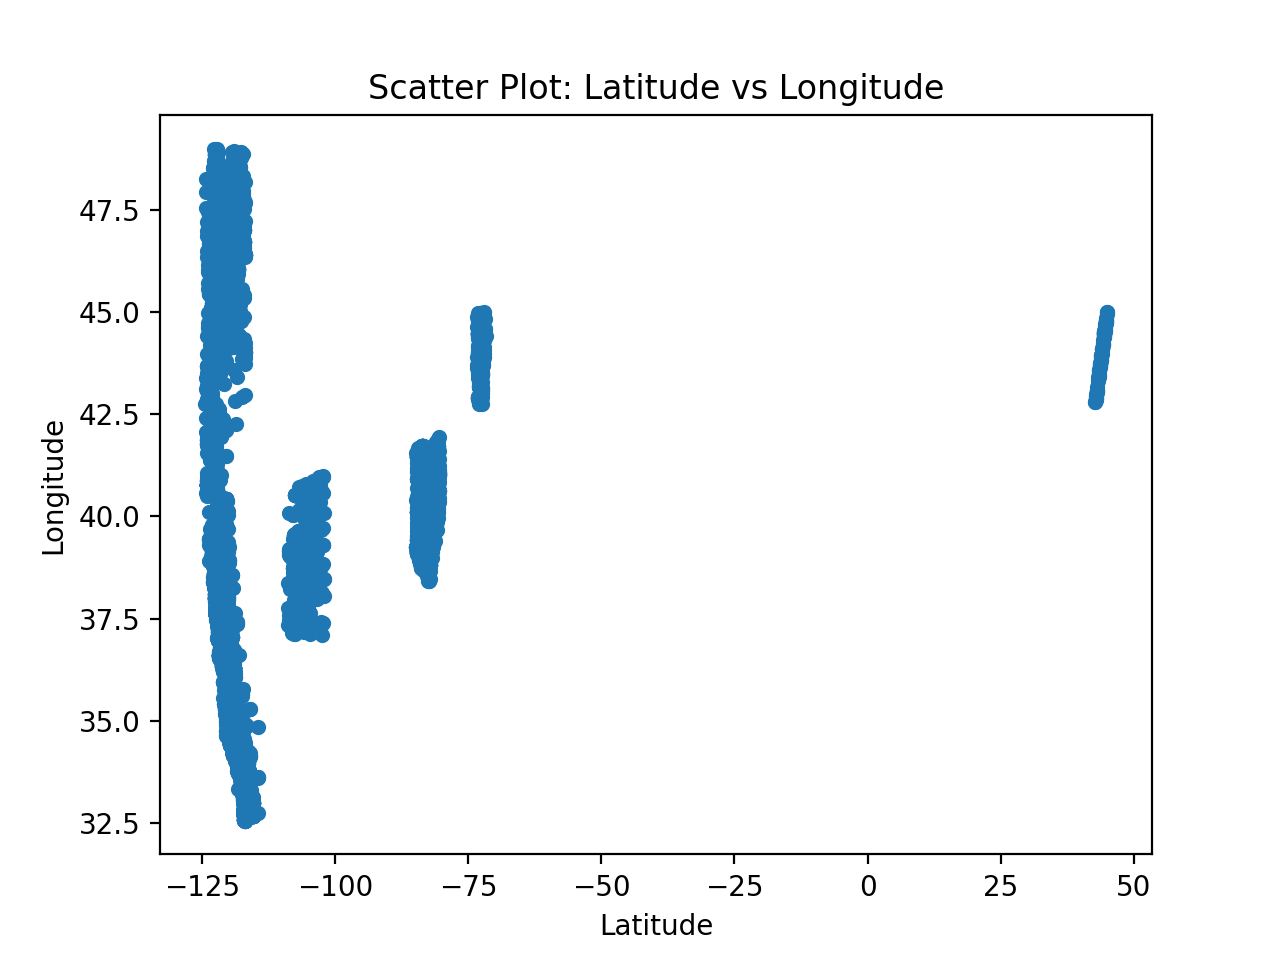

In [13]:
df1 = pd.DataFrame(measles_clean, columns=["lat", "lng"])
df1.plot.scatter(x="lng", y="lat");

plt.title("Scatter Plot: Latitude vs Longitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.savefig('s1.png')

Points on the extreme right are erroneous and must be dropped from the table. The easternmost point in the contiguous US is West Quoddy Head Lighthouse (Maine) with the coordinates (44.81756628922163, -66.95132155560584) so we can't have any longitude value greater than - 66.95132155560584.

In [14]:
measles_clean_lng = measles_clean[measles_clean['lng'] < 0]

<IPython.core.display.Javascript object>


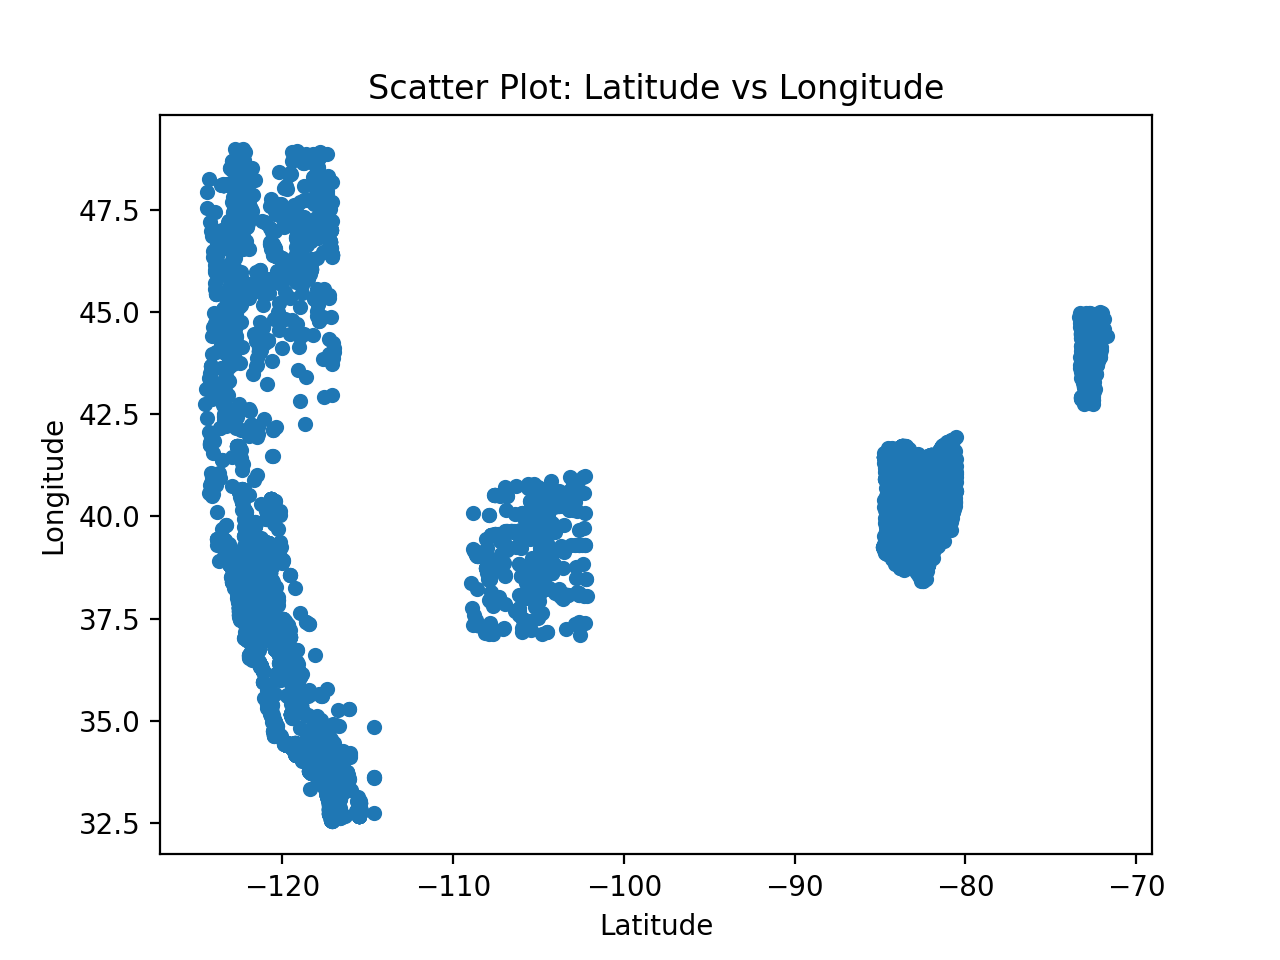

In [15]:
df2 = pd.DataFrame(measles_clean_lng, columns=["lat", "lng"])
df2.plot.scatter(x="lng", y="lat");

plt.title("Scatter Plot: Latitude vs Longitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.savefig('s2.png')

In [16]:
#New column for coloring states
measles_clean_lng['state2'] = measles_clean_lng['state']

C:\Users\fkmaa\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
measles_clean_lng.loc[measles_clean_lng['state'] == 'California', 'state2'] = 1

C:\Users\fkmaa\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
measles_clean_lng.loc[measles_clean_lng['state'] == 'California', 'state2'] = 1
measles_clean_lng.loc[measles_clean_lng['state'] == 'Colorado', 'state2'] = 2
measles_clean_lng.loc[measles_clean_lng['state'] == 'Ohio', 'state2'] = 3
measles_clean_lng.loc[measles_clean_lng['state'] == 'Oregon', 'state2'] = 4
measles_clean_lng.loc[measles_clean_lng['state'] == 'Washington', 'state2'] = 5
measles_clean_lng.loc[measles_clean_lng['state'] == 'Vermont', 'state2'] = 6

<IPython.core.display.Javascript object>


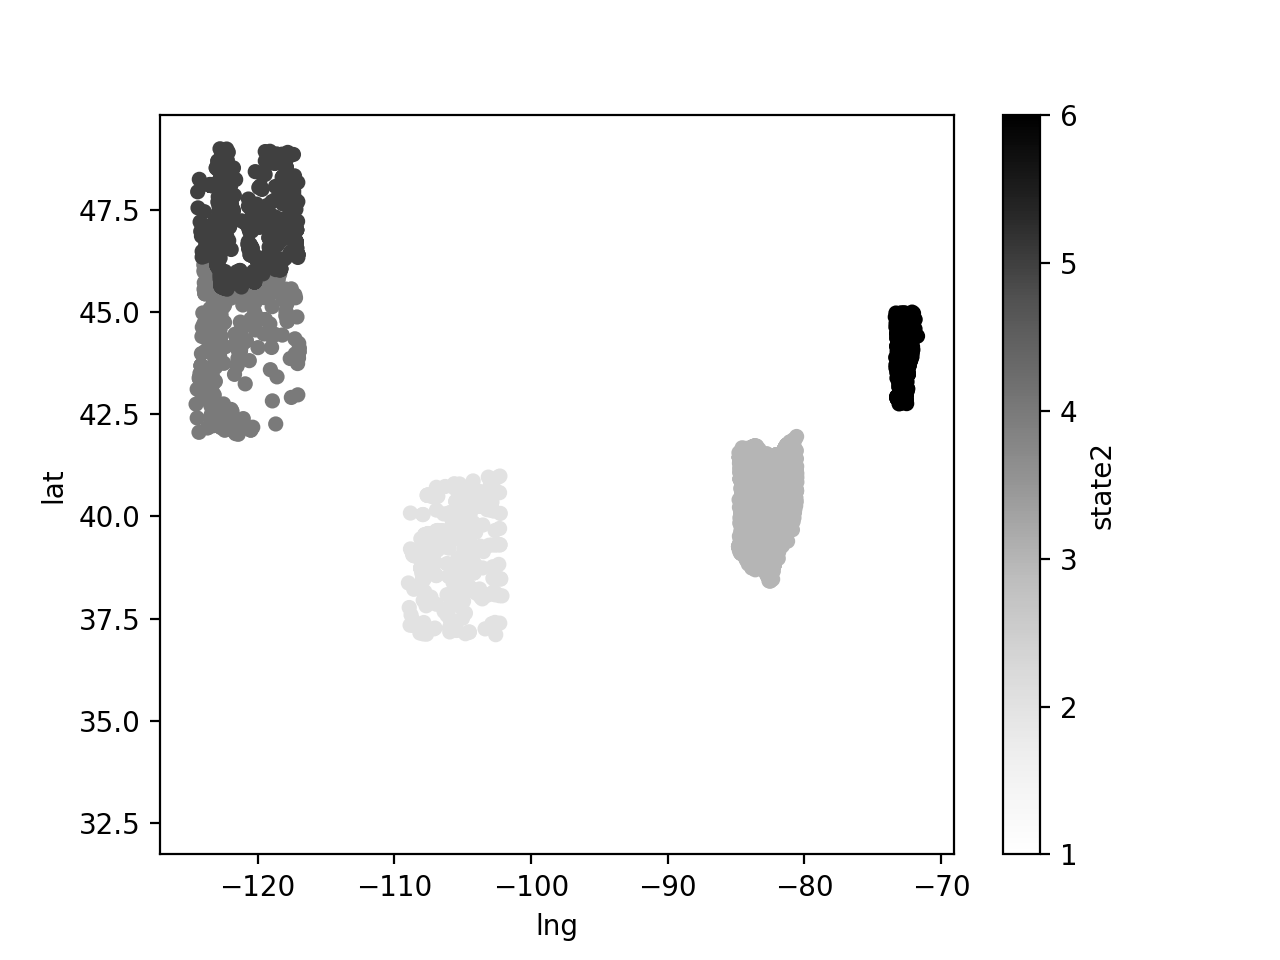

In [19]:
measles_clean_lng.plot.scatter('lng', 'lat', c='state2')


<IPython.core.display.Javascript object>


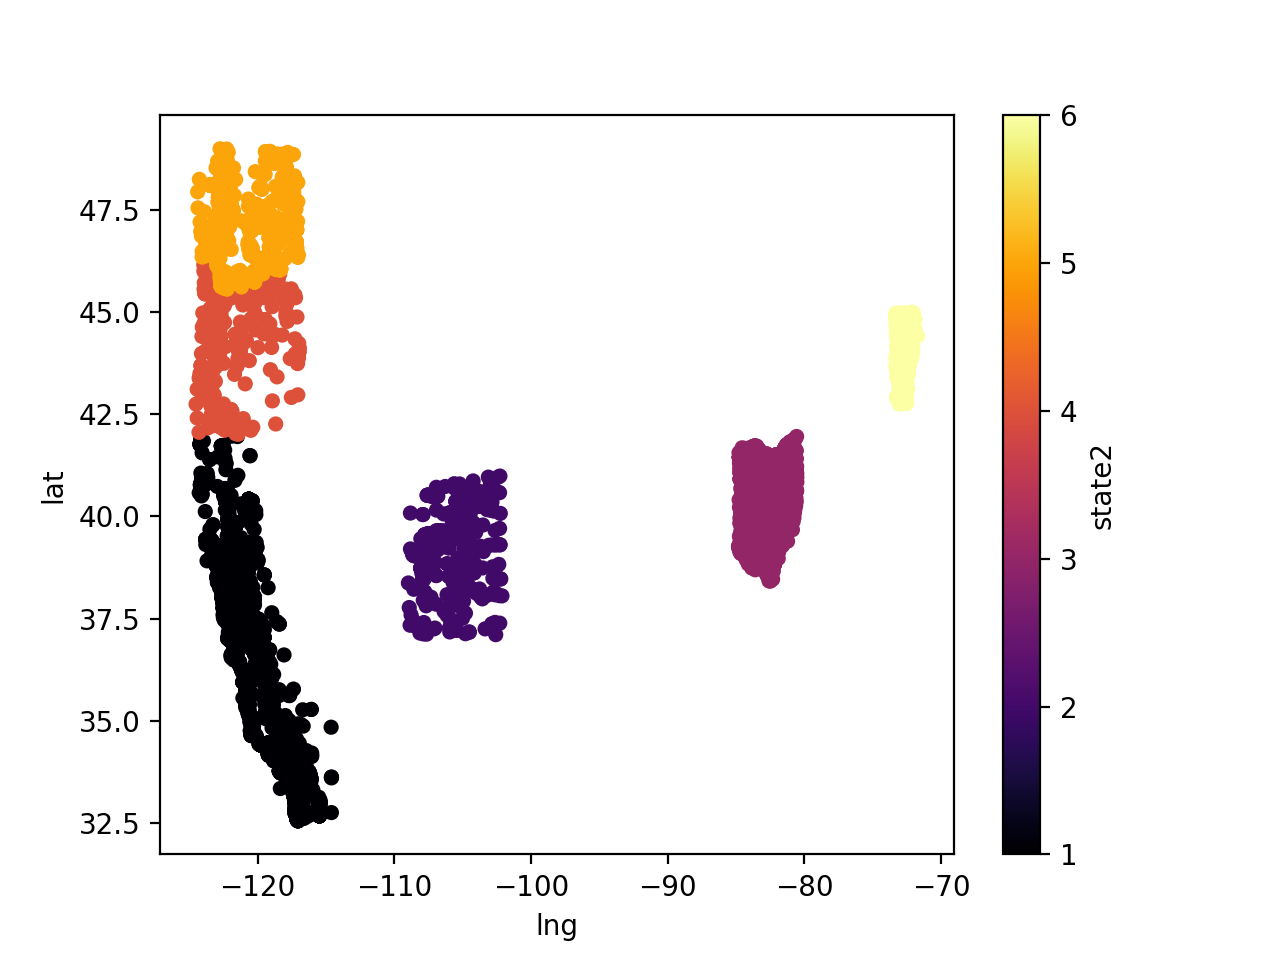

<IPython.core.display.Javascript object>


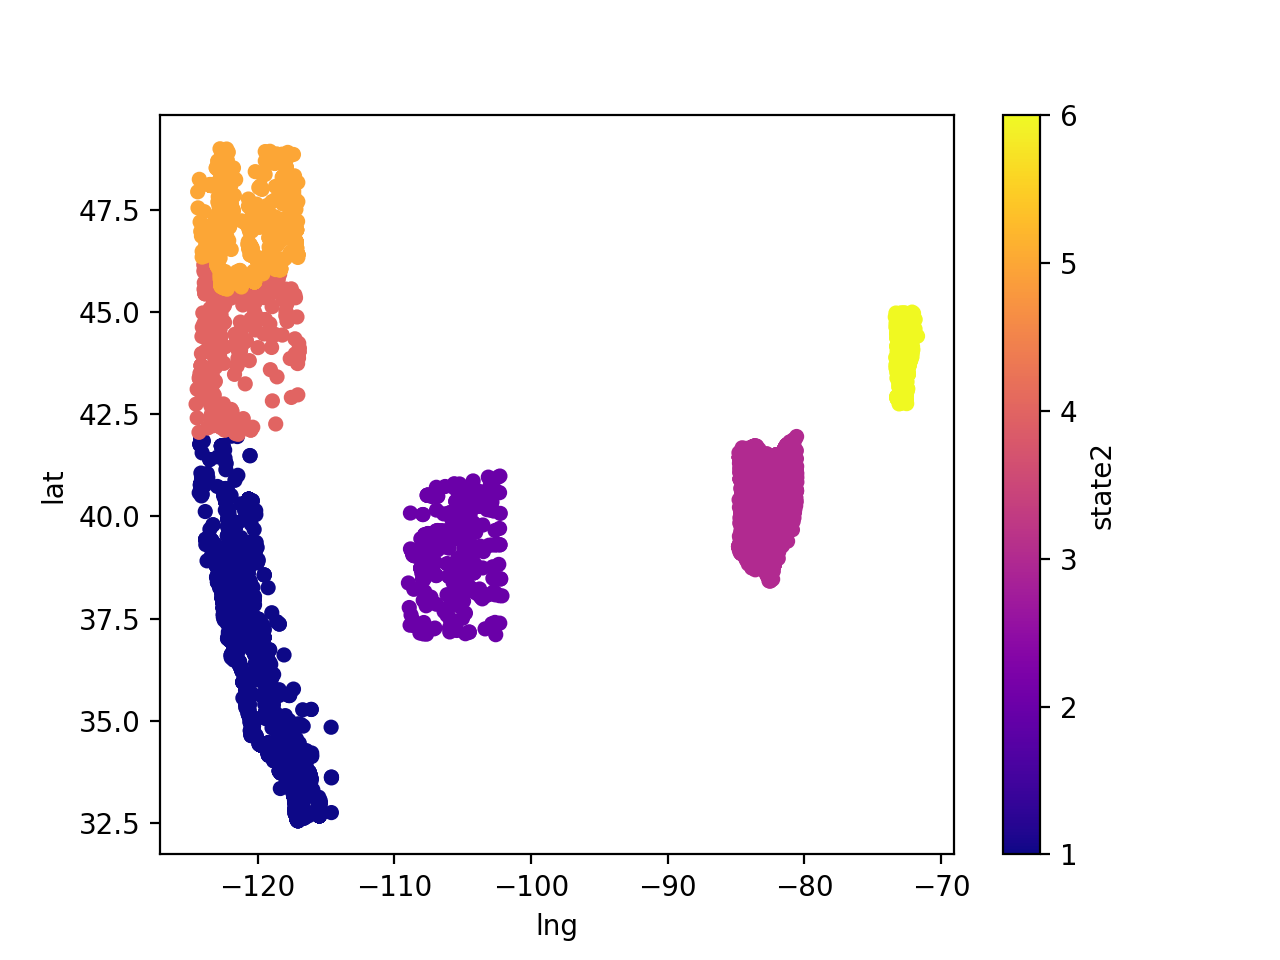

In [32]:
dfScat = measles_clean_lng[['lng','lat', 'state2']]
axScat = dfScat.plot(kind='scatter', x=0, y=1, c=2, colormap='inferno')
axScat = dfScat.plot(kind='scatter', x=0, y=1, c=2, colormap='plasma')

<IPython.core.display.Javascript object>


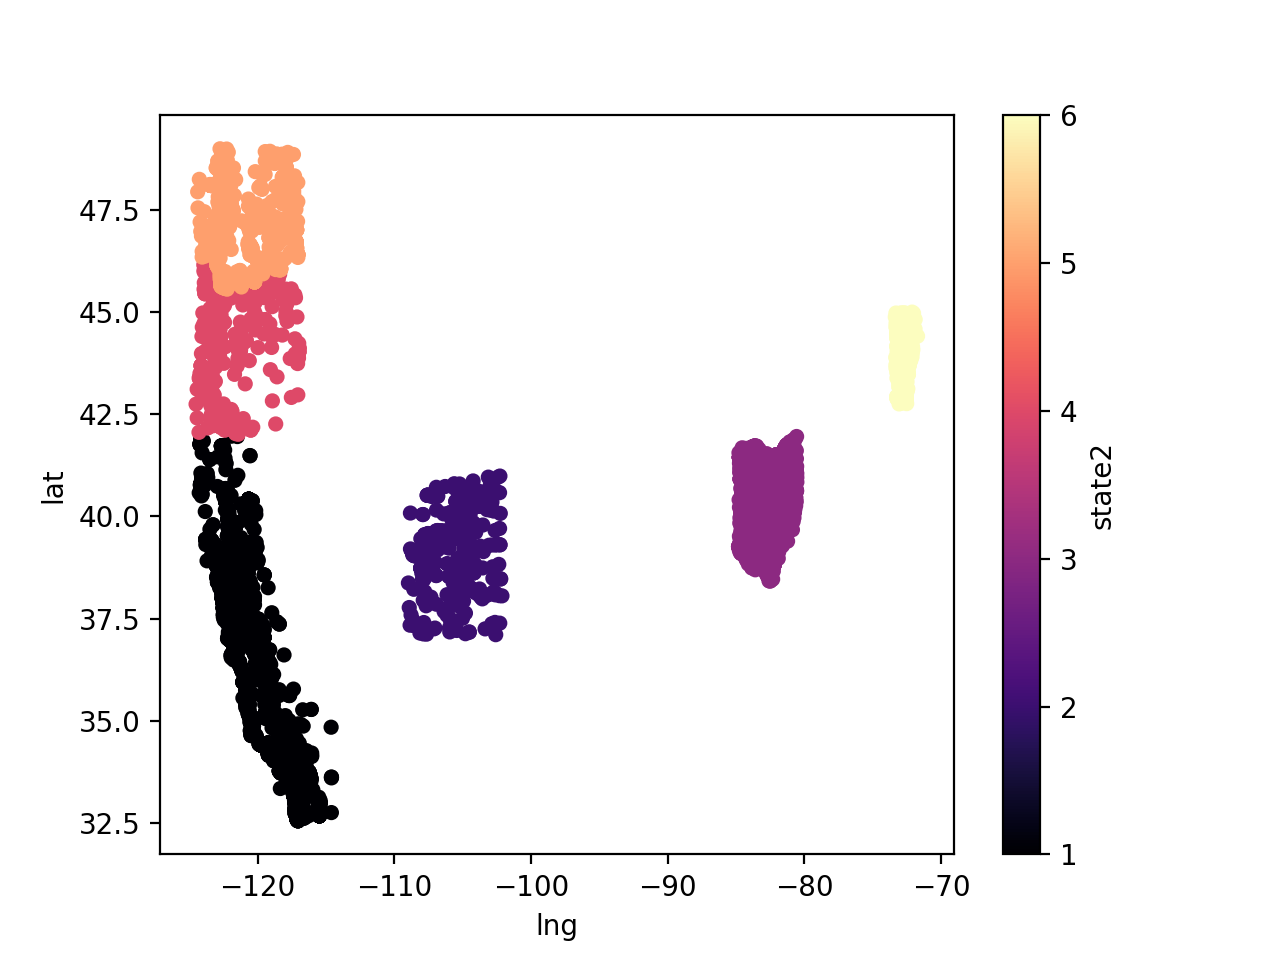

<IPython.core.display.Javascript object>


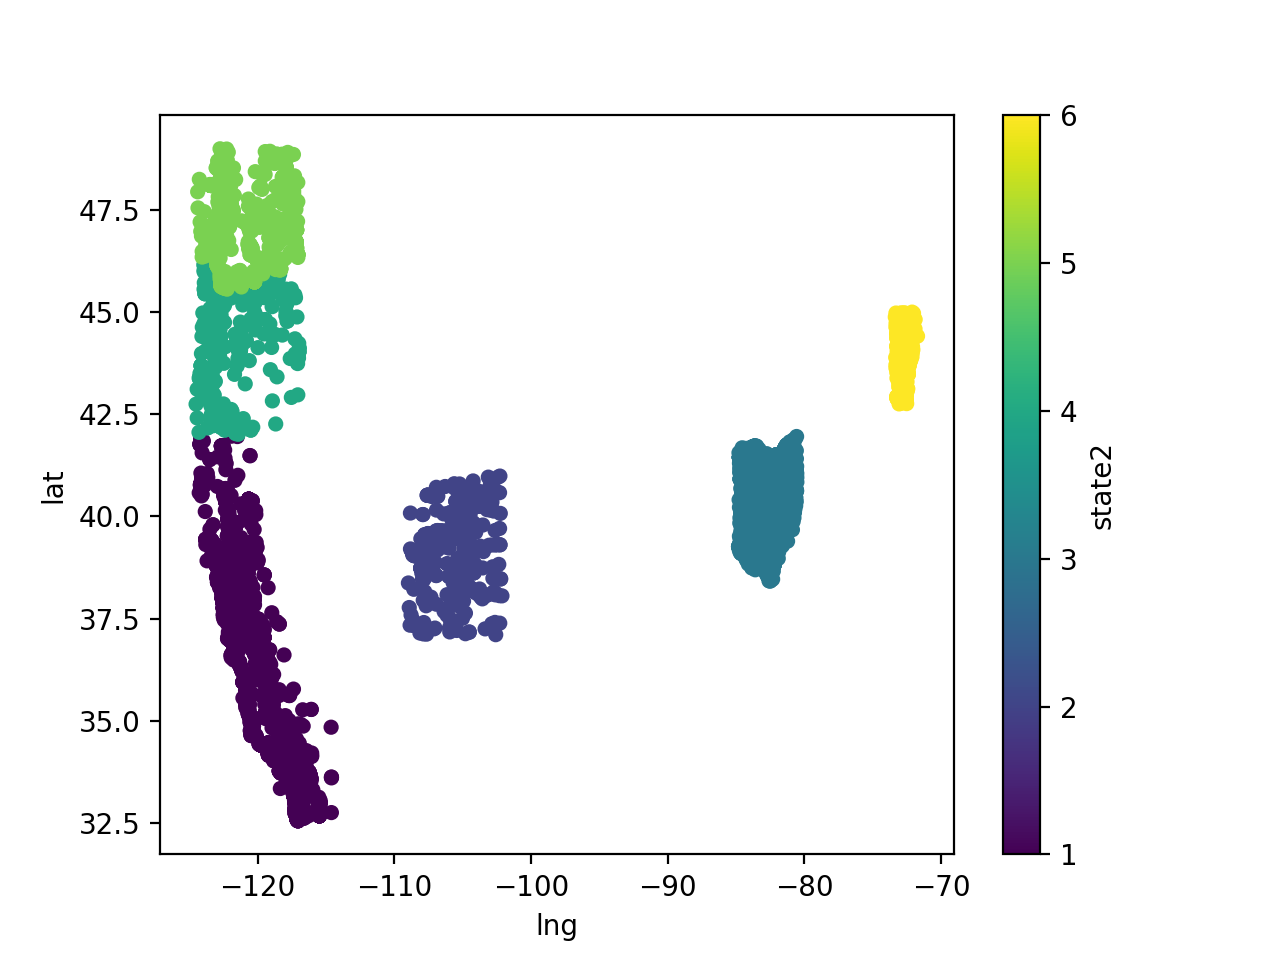

In [33]:
axScat = dfScat.plot(kind='scatter', x=0, y=1, c=2, colormap='magma')
axScat = dfScat.plot(kind='scatter', x=0, y=1, c=2, colormap='viridis')

In [182]:
dfx = measles_clean_lng[['mmr','type']]

<IPython.core.display.Javascript object>


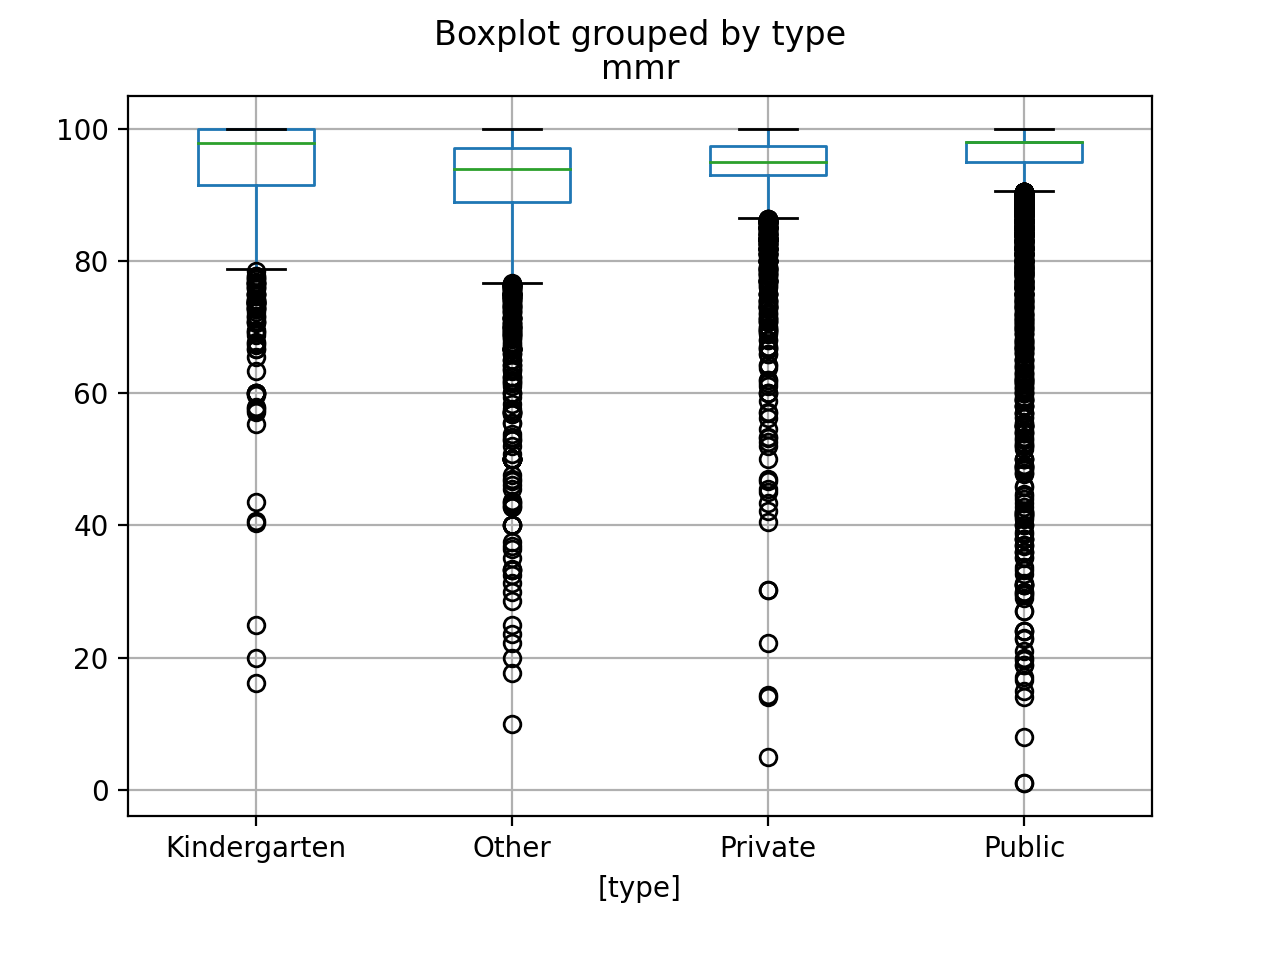

In [183]:
dfx.boxplot(by='type')